imports libraries

In [1]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install split-folders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [12]:
train_dir = r"C:\Users\adity\Soil classification IPYNB format\Soil classification Demo\Soil classification\Dataset\train"
val_dir = r"C:\Users\adity\Soil classification IPYNB format\Soil classification Demo\Soil classification\Dataset\val"
test_dir = r"C:\Users\adity\Soil classification IPYNB format\Soil classification Demo\Soil classification\Dataset\test"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(128,128), batch_size=32, class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_dir, target_size=(128,128), batch_size=32, class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(128,128), batch_size=32, class_mode="categorical"
)



Found 7348 images belonging to 27 classes.
Found 1051 images belonging to 27 classes.
Found 844 images belonging to 27 classes.


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\adity\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,395,803 (28.21 MB)

 Trainable params: 7,395,803 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_data, validation_data=val_data, epochs=10)


C:\Users\adity\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 66/230 ━━━━━━━━━━━━━━━━━━━━ 1:36 587ms/step - accuracy: 0.4221 - loss: 2.3915

C:\Users\adity\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


230/230 ━━━━━━━━━━━━━━━━━━━━ 145s 624ms/step - accuracy: 0.6682 - loss: 1.1668 - val_accuracy: 0.6784 - val_loss: 0.9436
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 64s 276ms/step - accuracy: 0.7639 - loss: 0.7517 - val_accuracy: 0.7345 - val_loss: 0.8391
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 66s 288ms/step - accuracy: 0.8254 - loss: 0.5644 - val_accuracy: 0.8563 - val_loss: 0.4650
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 64s 280ms/step - accuracy: 0.8876 - loss: 0.3834 - val_accuracy: 0.9001 - val_loss: 0.3303
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 62s 270ms/step - accuracy: 0.9281 - loss: 0.2429 - val_accuracy: 0.9591 - val_loss: 0.1567
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 63s 275ms/step - accuracy: 0.9601 - loss: 0.1501 - val_accuracy: 0.9648 - val_loss: 0.1361
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 65s 283ms/step - accuracy: 0.9639 - loss: 0.1360 - val_accuracy: 0.9648 - val_loss: 0.1538
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 60s 263ms/step - accuracy: 0.9767 - loss: 0.0978 - va

In [19]:
model.save("soil_model.h5")
print("✅ Model saved as soil_model.h5")


✅ Model saved as soil_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🌱 Predicted Soil Type: Black Soil
✅ Confidence Score: 62.18 %


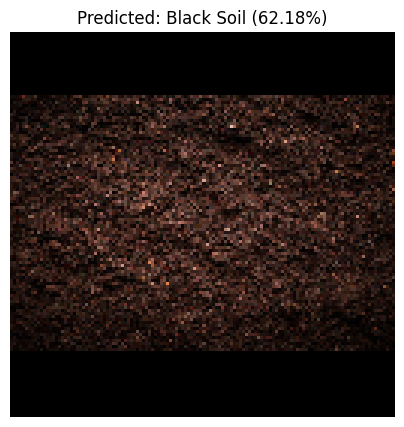

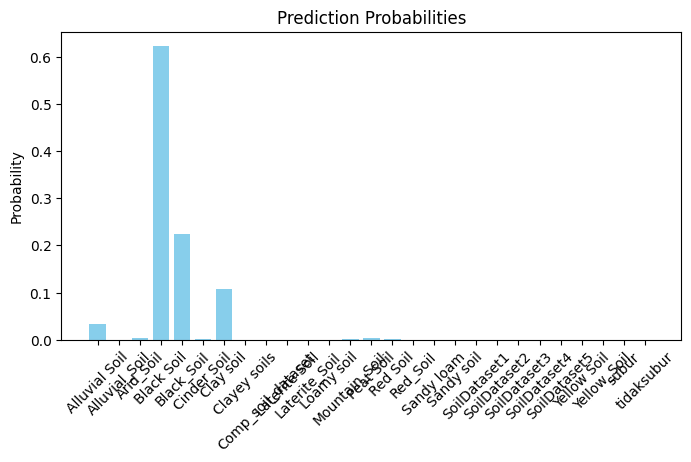

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get class names from your training data
class_names = list(train_data.class_indices.keys())

# Preprocess function (maintains proper aspect ratio)
def preprocess_image(img_path, img_size=128):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Maintain aspect ratio
    h, w, _ = img.shape
    scale = img_size / max(h, w)
    new_w, new_h = int(w * scale), int(h * scale)
    resized_img = cv2.resize(img, (new_w, new_h))

    # Pad to make square
    delta_w = img_size - new_w
    delta_h = img_size - new_h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    color = [0, 0, 0]  # black padding
    padded_img = cv2.copyMakeBorder(resized_img, top, bottom, left, right,
                                    cv2.BORDER_CONSTANT, value=color)

    processed_img = padded_img / 255.0
    return np.expand_dims(processed_img, axis=0), padded_img

# 🔸 Change this to your image path
img_path = "test_image.jpg"

processed_img, display_img = preprocess_image(img_path)

# Make prediction
preds = model.predict(processed_img)[0]
predicted_class = class_names[np.argmax(preds)]
confidence = np.max(preds)

# Print results
print("🌱 Predicted Soil Type:", predicted_class)
print("✅ Confidence Score:", round(confidence*100, 2), "%")

# Show image clearly
plt.figure(figsize=(5, 5))
plt.imshow(display_img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
plt.show()

# Probability chart
plt.figure(figsize=(8, 4))
plt.bar(class_names, preds, color="skyblue")
plt.ylabel("Probability")
plt.title("Prediction Probabilities")
plt.xticks(rotation=45)
plt.show()



27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


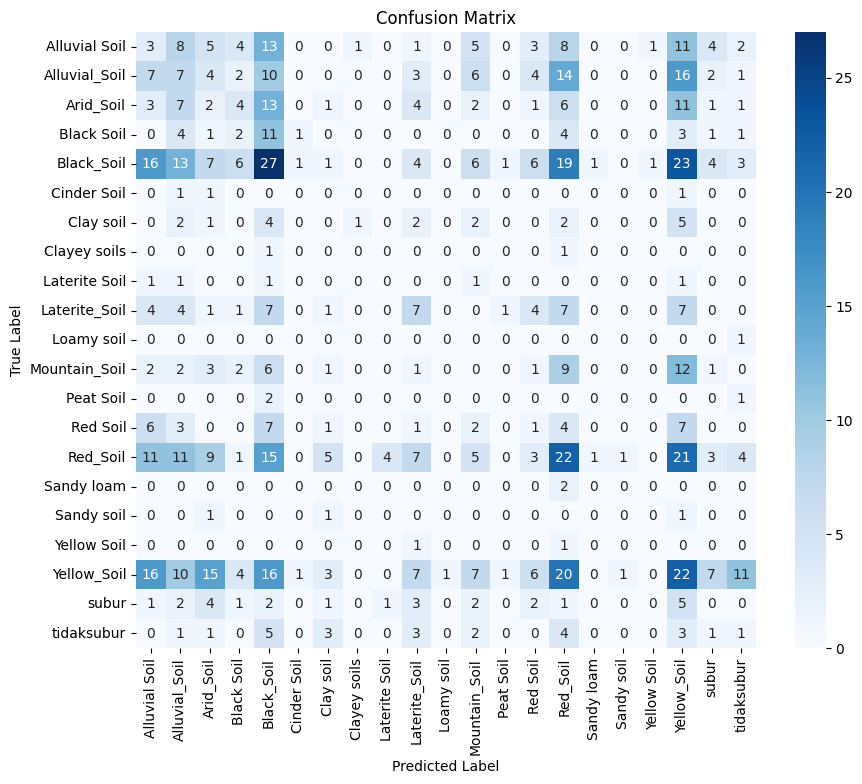


📊 Classification Report (Safe & Correct):

               precision    recall  f1-score   support

Alluvial Soil       0.04      0.04      0.04        69
Alluvial_Soil       0.09      0.09      0.09        76
    Arid_Soil       0.04      0.04      0.04        56
   Black Soil       0.07      0.07      0.07        28
   Black_Soil       0.19      0.19      0.19       139
  Cinder Soil       0.00      0.00      0.00         3
    Clay soil       0.00      0.00      0.00        19
 Clayey soils       0.00      0.00      0.00         2
Laterite Soil       0.00      0.00      0.00         5
Laterite_Soil       0.16      0.16      0.16        44
   Loamy soil       0.00      0.00      0.00         1
Mountain_Soil       0.00      0.00      0.00        40
    Peat Soil       0.00      0.00      0.00         3
     Red Soil       0.03      0.03      0.03        32
     Red_Soil       0.18      0.18      0.18       123
   Sandy loam       0.00      0.00      0.00         2
   Sandy soil       

In [23]:
# ==============================
# Confusion Matrix + Report (SAFE VERSION)
# ==============================
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# True labels
y_true = test_data.classes

# Predictions
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get only the labels that actually appear in y_true
unique_labels = np.unique(y_true)

# Match class names with available labels
filtered_class_names = [class_names[i] for i in unique_labels]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=unique_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=filtered_class_names,
            yticklabels=filtered_class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📊 Classification Report (Safe & Correct):\n")
print(classification_report(
    y_true,
    y_pred_classes,
    labels=unique_labels,
    target_names=filtered_class_names,
    zero_division=0
))



In [24]:
!pip install scikit-learn seaborn


Defaulting to user installation because normal site-packages is not writeable
